In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

## 3.1 matplotlib
簡單的點圖

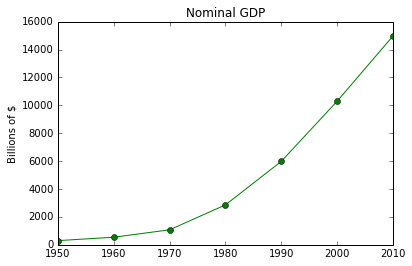

In [8]:
def make_chart_simple_line_chart():

    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

    # add a title
    plt.title("Nominal GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

make_chart_simple_line_chart()

增加X軸

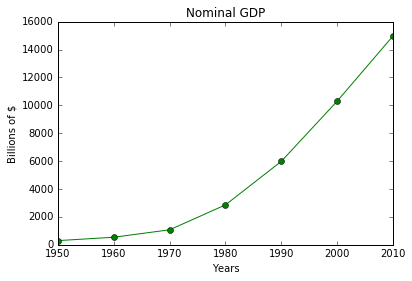

In [10]:
def make_chart_simple_line_chart_modified():

    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

    # add a title
    plt.title("Nominal GDP")

    # add a label to the x-axis
    plt.xlabel("Years")
  
    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

make_chart_simple_line_chart_modified()

## 3.2 條狀圖
如果想要展示某些"離散"的向務集合中的數量是如何變化的，可以使用條狀圖。

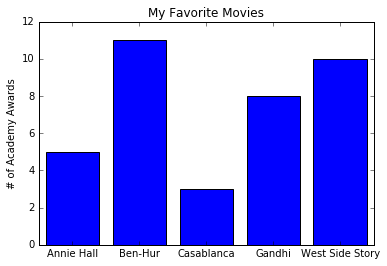

In [12]:
def make_chart_simple_bar_chart():

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]

    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

    plt.show()
    
make_chart_simple_bar_chart()

也可以用來探索如何分布

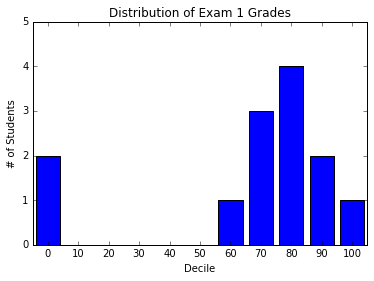

In [14]:
def make_chart_histogram():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

make_chart_histogram()

Counter({80: 4, 70: 3, 0: 2, 90: 2, 100: 1, 60: 1})


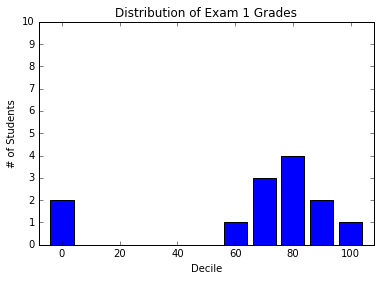

In [31]:
def make_chart_histogram_modified():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)
    print(histogram)
    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-8, 108, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    # plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.yticks([i for i in range(11)])    
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

make_chart_histogram_modified()

需要思考一下構成圖的要件，第一個案例中似乎沒有關於X軸的敘述   
但第二個案例我們還需要特別設定X軸   
或許也可以特別設定y軸


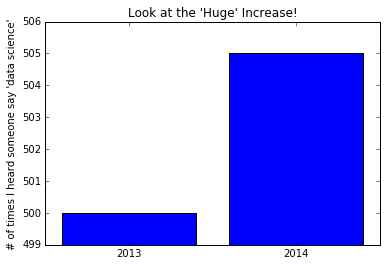

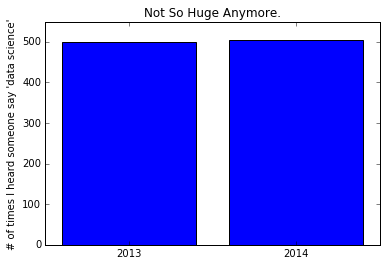

In [33]:
def make_chart_misleading_y_axis(mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")
    plt.show()
    
# Run
make_chart_misleading_y_axis(mislead=True)
make_chart_misleading_y_axis(mislead=False)